In [1]:
using LowRankModels, Plots, Random, SparseArrays, DataFrames, CSV

In [2]:
X_train = DataFrame(CSV.File("out.csv"))

,user_days_spent_watching,stats_mean_score,join_year,age,year_last_online
,Float64,Float64,Int64,Float64,Int64
1,13.8736,9.63,2007,36.4911,2018
2,28.0882,7.96,2012,23.5243,2018
3,94.8535,8.04,2013,29.9392,2018
4,133.731,7.18,2012,28.1705,2015
5,39.9264,6.61,2009,31.3082,2018
6,46.7368,8.02,2006,33.0741,2009
7,11.2611,9.53,2007,31.018,2015
8,72.5125,7.34,2009,26.9959,2009
9,65.5194,8.24,2012,27.0836,2017


In [25]:
datatypes = [:real, :real, :real, :real, :real, :bool, :bool, :bool]
losses = Loss[QuadLoss(), QuadLoss(), QuadLoss(), QuadLoss(), QuadLoss(), LogisticLoss(), LogisticLoss(), LogisticLoss()]

8-element Vector{Loss}:
 QuadLoss(1.0, RealDomain())
 QuadLoss(1.0, RealDomain())
 QuadLoss(1.0, RealDomain())
 QuadLoss(1.0, RealDomain())
 QuadLoss(1.0, RealDomain())
 LogisticLoss(1.0, BoolDomain())
 LogisticLoss(1.0, BoolDomain())
 LogisticLoss(1.0, BoolDomain())

In [26]:
m, n, k = 19005, 59, 7
rx = UnitOneSparseConstraint() # each row is assigned to exactly one cluster
ry = ZeroReg() # no regularization on the cluster centroids
glrm = GLRM(X_train, losses, rx, ry, k)

GLRM(19005×8 DataFrame. Omitted printing of 4 columns
│ Row   │ user_days_spent_watching │ stats_mean_score │ join_year │ age     │
│       │ Float64                  │ Float64          │ Int64     │ Float64 │
├───────┼──────────────────────────┼──────────────────┼───────────┼─────────┤
│ 1     │ 13.8736                  │ 9.63             │ 2007      │ 36.4911 │
│ 2     │ 28.0882                  │ 7.96             │ 2012      │ 23.5243 │
│ 3     │ 94.8535                  │ 8.04             │ 2013      │ 29.9392 │
│ 4     │ 133.731                  │ 7.18             │ 2012      │ 28.1705 │
│ 5     │ 39.9264                  │ 6.61             │ 2009      │ 31.3082 │
│ 6     │ 46.7368                  │ 8.02             │ 2006      │ 33.0741 │
│ 7     │ 11.2611                  │ 9.53             │ 2007      │ 31.018  │
│ 8     │ 72.5125                  │ 7.34             │ 2009      │ 26.9959 │
│ 9     │ 65.5194                  │ 8.24             │ 2012      │ 27.0836 │
│ 10    │ 

In [20]:
init_svd!(glrm)

GLRM(19005×8 DataFrame. Omitted printing of 4 columns
│ Row   │ user_days_spent_watching │ stats_mean_score │ join_year │ age     │
│       │ Float64                  │ Float64          │ Int64     │ Float64 │
├───────┼──────────────────────────┼──────────────────┼───────────┼─────────┤
│ 1     │ 13.8736                  │ 9.63             │ 2007      │ 36.4911 │
│ 2     │ 28.0882                  │ 7.96             │ 2012      │ 23.5243 │
│ 3     │ 94.8535                  │ 8.04             │ 2013      │ 29.9392 │
│ 4     │ 133.731                  │ 7.18             │ 2012      │ 28.1705 │
│ 5     │ 39.9264                  │ 6.61             │ 2009      │ 31.3082 │
│ 6     │ 46.7368                  │ 8.02             │ 2006      │ 33.0741 │
│ 7     │ 11.2611                  │ 9.53             │ 2007      │ 31.018  │
│ 8     │ 72.5125                  │ 7.34             │ 2009      │ 26.9959 │
│ 9     │ 65.5194                  │ 8.24             │ 2012      │ 27.0836 │
│ 10    │ 

In [27]:
X, Y, ch_svd = fit!(glrm)

Fitting GLRM
Iteration 10: objective value = 5.976670782587505e7


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-0.6933832591770437 0.029017218997866665 … 1.2696105958681694 1.1299390086101038; -1.704698552148289 -0.09592547557806326 … -0.5297712069236507 -0.18042806626684652; … ; 0.23435283360110848 -1.7057404125649518 … 1.7977699838731467 -0.11547232371837673; 59.47260813505046 6.228585795844685 … 0.626098445279005 -0.45626536183625677], ConvergenceHistory("ProxGradGLRM", [Inf, 1.5409536996102753e11, 4.96255430256424e9, 6.58068278967085e8, 2.88495015104905e8, 1.7096051399915186e8, 1.2753116654920332e8, 1.1112867261813581e8, 1.079121574559219e8, 6.721365052862385e7, 5.976670782587505e7, 5.798564255692987e7, 5.745210967656e7, 5.72622126175569e7, 5.718919863357919e7, 5.716747886856048e7, 5.7032575570564136e7, 5.700999128832336e7, 5.7004947738103054e7], Float64[], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

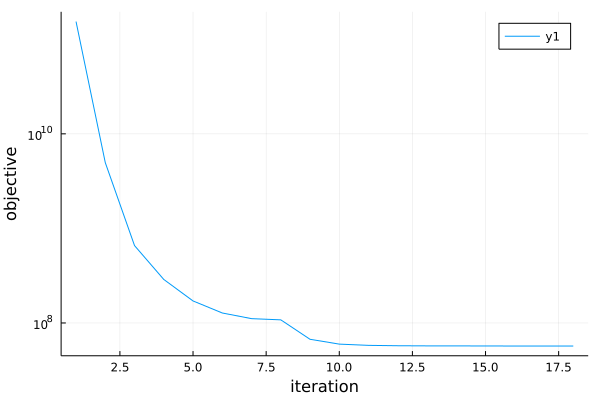

In [28]:
plot(ch_svd.objective[2:end])  # first entry is infinite, since initial factors are not nonnegative
xlabel!("iteration")
ylabel!("objective")
yaxis!(:log)

In [29]:
#Stupid cell either takes forever to run or never terminates
#cross_validate(glrm::GLRM, nfolds=5, params=Params(); verbose=false, error_fn=objective)

In [30]:
ch_svd.objective[end]

5.7004947738103054e7

In [ ]:
#Plot Number of Clusters vs. Objective
#Look for elbow in graph from steep to shallow slope

k 2 - 

k 5 - 3.8275296363806844e7 with svd, 5.7008855550473385e7

k 7 - 5.700367710751689e7 with svd, 5.7004947738103054e7

k 9 - 

k 10 - 3.4049160467605524e7 but 5.710295759583011e7 without svd. HUH?

k 11 - 3.843086548410166e7 but 5.709908495648059e7 without svd.

k 12 - 5.7098866838974044e7

k 15 - 5.7098855550473385e7

k 20 - 5.642958461651761e7

k 30 - 5.415409426938726e7